In [1]:
# Import libaries: 

#Data manipulation
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection

# Change the parameters
sns.set(context='paper',style="whitegrid",font='Times New Roman',font_scale=1.2)

In [2]:
# The name of the files are given by these numbers
numbers = ['9','12','15','18','21','24']

# The known angles of the experiment are in this list
angles =[5,15,25,35,45,55]

# Function that later will be applied into the dataframe
def ang(x):
    x = str(x)
    return f'Angle: '+ x

# Generate a list of dataframes (looking foward to concatenate)
dataframes=[]
# A for loop to generate the dataframes from files
for i,let in enumerate(numbers):
    #Read files
    with open(f'./SiO {let}(Si).xy', 'r') as fout:
        value=fout.read()
    #Clean data a little
    vals = value.split('#')[-1].split('\n')
    while '' in vals:
        vals.remove('')
    #Generate the dataframe
    data = pd.DataFrame([row.split('  ') for row in vals], columns=[f'bind',f'exp']).astype('float')
    #Add a new column to indicate that there is an angle dependence
    data['Angle']=90-angles[i]*np.ones(data.shape[0])
    data['Angle']=data['Angle'].apply(ang)
    #Integrate to the list
    dataframes.append(data)
    
#Generate a huge dataframe with all the information
all_data = pd.concat(dataframes, axis=0)

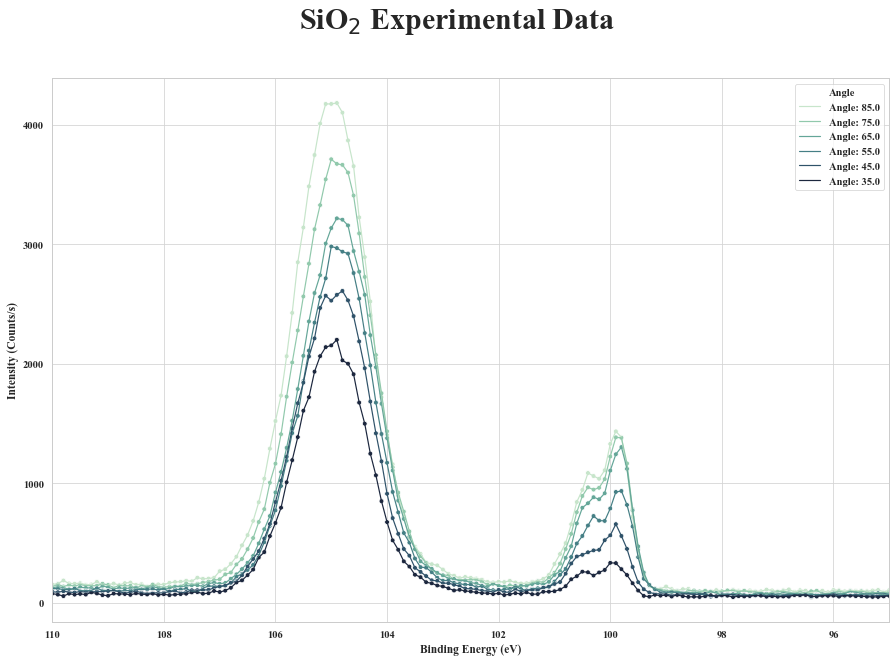

In [18]:
# Select a palette: 
COLORS=[(0,0,1,.2),(0,0,1,.3),(0,0,1,.4),(0,0,1,.5),(0,0,1,.6),(0,0,1,.7)]
COLORS2=sns.cubehelix_palette(rot=-.4)

# Plot with seaborn lineplot, add a hue. 

plt.figure(figsize=(15,10))
sns.scatterplot(all_data.bind, all_data.exp, hue=all_data.Angle, palette=COLORS2,legend=False)
sns.lineplot(all_data.bind, all_data.exp, hue=all_data.Angle, palette=COLORS2)
plt.xlim(max(all_data.bind), min(all_data.bind))

plt.xlabel('Binding Energy (eV)')
plt.ylabel('Intensity (Counts/s)')
plt.suptitle('SiO$_2$ Experimental Data', fontsize=30)
plt.grid(which='both', c='#D4D4D4')
plt.show()

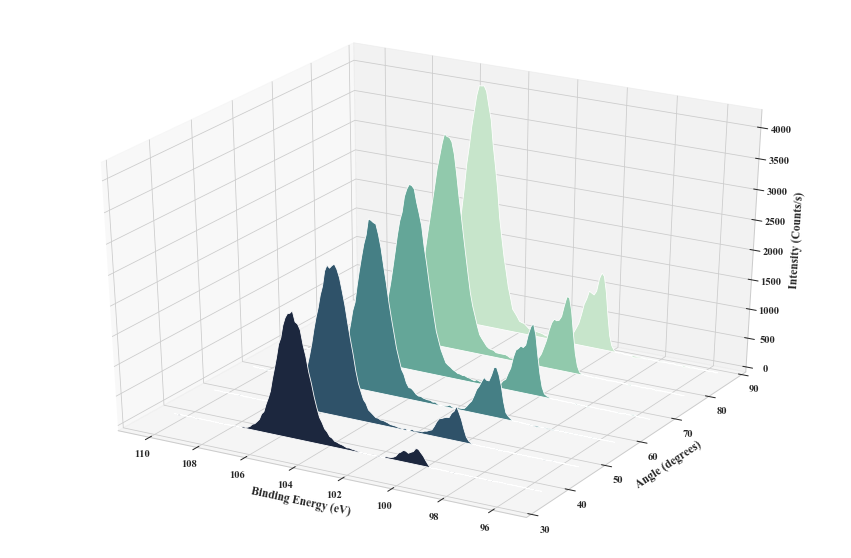

In [19]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')


# Add vertices for a polygon figure which is a list of touples (X,y)
verts2=[]
for data in dataframes:
    value_verts=[]
    for i in range(len(list(data.exp))):
        z=(float(list(data.bind)[i]),float(list(data.exp)[i]))
        value_verts.append(z)
    verts2.append(value_verts)

# Generate a collection
poly = PolyCollection(verts2,facecolors=COLORS2)


# Determine the positions on z axis. 
zs=90-np.array(angles)

# Plot
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.set_xlabel('Binding Energy (eV)')
ax.set_xlim3d(111, 95)
ax.set_ylabel('Angle (degrees)')
ax.set_ylim3d(30, 90)
ax.set_zlabel('Intensity (Counts/s)')
ax.set_zlim3d(0, 4200)
plt.show()

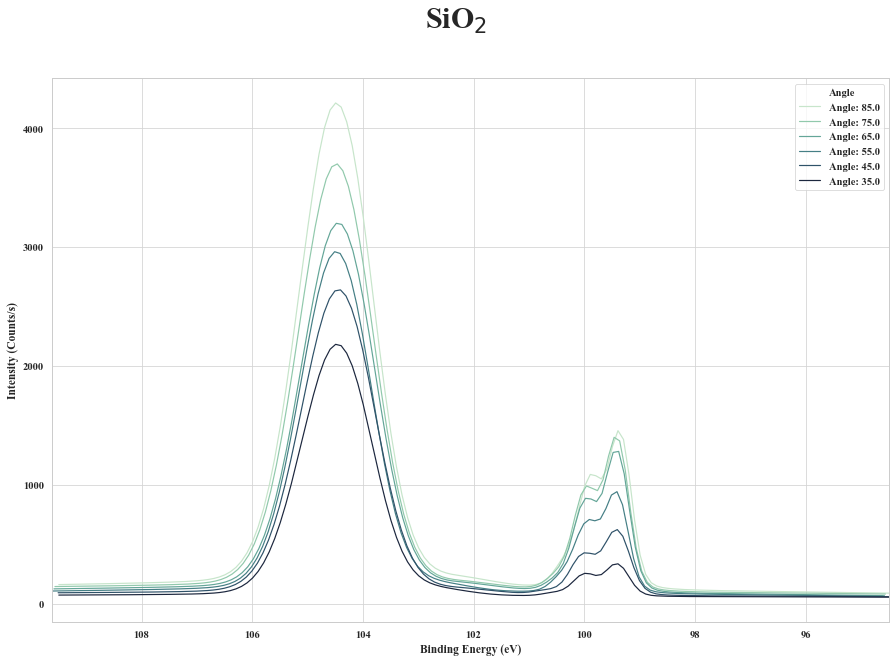

In [20]:
cal_dataframes = []
for i,let in enumerate(numbers):
    cal_data=pd.read_csv(f'./Angulaes_sin_ajuste/SiO {let}(Si).fit', sep='\t')[['x','yCal']].astype('float')
    cal_data['Angle'] = 90-angles[i]*np.ones(cal_data.shape[0])
    cal_data['Angle'] = cal_data['Angle'].apply(ang)
    cal_dataframes.append(cal_data)
all_cal_data = pd.concat(cal_dataframes, axis=0)
plt.figure(figsize=(15,10))
sns.lineplot(all_cal_data.x, all_cal_data.yCal, hue=all_cal_data.Angle, palette=COLORS2)
plt.xlim(max(all_cal_data.x), min(all_cal_data.x))

plt.xlabel('Binding Energy (eV)')
plt.ylabel('Intensity (Counts/s)')
plt.suptitle('SiO$_2$ ', fontsize=30)
plt.grid(which='both', c='#D4D4D4')
plt.show()

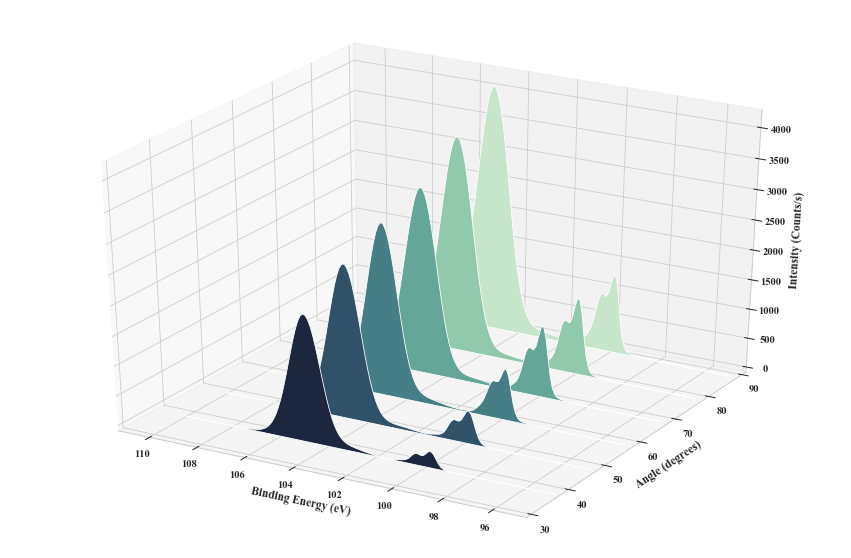

In [21]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

verts3=[]
for data in cal_dataframes:
    value_verts=[]
    for i in range(len(list(data.x))):
        z=(float(list(data.x)[i]),float(list(data.yCal)[i]))
        value_verts.append(z)
    verts3.append(value_verts)
    
zs=90-np.array(angles)
    
poly = PolyCollection(verts3,facecolors=COLORS2)
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.set_xlabel('Binding Energy (eV)')
ax.set_xlim3d(111, 95)
ax.set_ylabel('Angle (degrees)')
ax.set_ylim3d(30, 90)
ax.set_zlabel('Intensity (Counts/s)')
ax.set_zlim3d(0, 4200)
plt.show()

In [52]:
table_areas = pd.read_csv('./Angulaes_sin_ajuste/areaTable.tbl', sep='\t')

cols = list(filter(lambda x: 'Unnamed' not in x, list(table_areas.columns)))
table_areas = table_areas[cols].head(6)
table_areas.columns = ['angle','x','p0','p1','p2','p3','tot_area']
table_areas['p_si_o2']=table_areas.p0+table_areas.p2
table_areas['p_si']=table_areas.p1+table_areas.p3
table_areas['p_siysi_o2']=table_areas.p_si/table_areas.p_si_o2
table_areas

,angle,x,p0,p1,p2,p3,tot_area,p_si_o2,p_si,p_siysi_o2
0,5.0,85.0,1039.40,6842.1,276.070,132.460,8290.011,1315.470,6974.560,5.301953
1,15.0,75.0,1094.80,6061.3,172.390,102.510,7431.037,1267.190,6163.810,4.864156
2,25.0,65.0,1019.30,5171.4,138.050,100.980,6429.677,1157.350,5272.380,4.555562
3,35.0,55.0,671.46,4609.1,180.960,105.350,5566.844,852.420,4714.450,5.530666
4,45.0,45.0,502.86,4280.2,55.238,79.527,4917.870,558.098,4359.727,7.811759
5,55.0,35.0,232.20,3411.3,40.984,90.664,3775.156,273.184,3501.964,12.819067


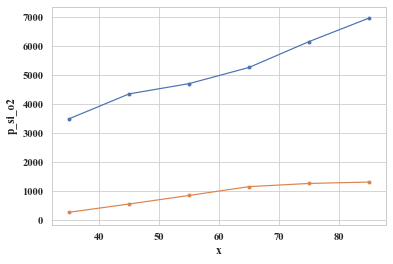

In [56]:
sns.lineplot(table_areas.x,table_areas.p_si)
sns.scatterplot(table_areas.x,table_areas.p_si)

sns.lineplot(table_areas.x,table_areas.p_si_o2)
sns.scatterplot(table_areas.x,table_areas.p_si_o2)

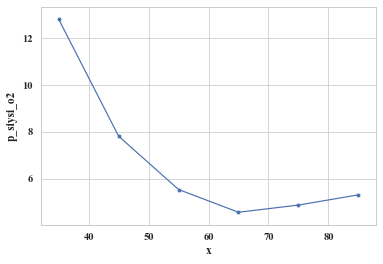

In [57]:
sns.lineplot(table_areas.x,table_areas.p_siysi_o2)
sns.scatterplot(table_areas.x,table_areas.p_siysi_o2)